In [1]:
# fixing Train,val,test split
# train 10 loops with 1 epoch
# get accuracy on test split

In [2]:
import pandas as pd
import gensim
from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


C:\Users\Harsha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [3]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('F:/Googlevectors/GoogleNews-vectors-negative300.bin', binary=True)
vocab = model.vocab.keys()

In [5]:
def cleantext(s):
    ct=""
    for each in s.split():
        each=re.sub(r'[^\w]', '',each)
        #t=ps.stem(each.lower())
        t=lemmatizer.lemmatize(each.lower())
        ct=ct+t+' '
    return ct
def sent2list(sent,model=model):
    vec=[]
    w2v=np.zeros(300).tolist()
    sent=cleantext(sent)
    for each in sent.split():
        try :
            vec.append(model.wv[each].tolist())
            #print(each)
        except:
            #here i have to add noise if words are not in vocab
            pass
    if len(vec)>=25:
        return vec[:25]
    else :
        for i in range(25-len(vec)):
            vec.append(w2v)
        return vec[:25]

In [6]:
dataset=pd.read_csv('../Data/QnA/QandNQ.csv')

In [7]:
def fitinmodX(X):
    X=X.tolist()
    # X as lists of lists 
    h=[]
    #print(len(X))
    for e in range(len(X)):
        h.append(np.hstack(X[e]))
    v=np.hstack(h)
    return np.reshape(v,(len(X),25,300))
def fitinmodY(Y):
    #Y as numpy array
    return np.reshape(np.array(Y),(Y.shape[0],1))

In [17]:
# data train -test split 

#dataxy=dataxy.rename(columns={'questions':'Y','sent2list':'X'})
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset, test_size=0.2, random_state=1)

In [19]:
X_train.head(),y_train.head()

(                                                Sentences  length  questions
 80562   For seamless connection of multimodal transpor...      12          1
 147601      Brooke Foss Westcott (1825–1901) and Fenton J       7          0
 25240   According to the 2000 United States Census, ho...      15          1
 107147   The under 5 mortality rate, per 1,000 births,...      24          0
 133086   On December 2, 2015, a 5-2 majority of the Co...      25          0,
                                                 Sentences  length  questions
 80562   For seamless connection of multimodal transpor...      12          1
 147601      Brooke Foss Westcott (1825–1901) and Fenton J       7          0
 25240   According to the 2000 United States Census, ho...      15          1
 107147   The under 5 mortality rate, per 1,000 births,...      24          0
 133086   On December 2, 2015, a 5-2 majority of the Co...      25          0)

In [21]:
k=20000

mod_data={'loss':[],'acc':[],'val_loss':[],'val_acc':[]}
for j in range(10):
    print("epoch : ",j)
    for i in range(0,X_train.shape[0],k):
        print(i)
        if i==0 and j==0:
            mod = Sequential()
            mod.add(LSTM(25,input_shape=(25,300)))
            mod.add(Dense(1, activation='sigmoid'))
            mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        first_X= X_train[i:i+k]
        first_y=y_train[i:i+k]
        first_X['sent2list']=first_X['Sentences'].apply(sent2list)
        first_X=first_X.reset_index(drop=True)
        first_y=first_y.reset_index(drop=True)
        history=mod.fit(fitinmodX(first_X['sent2list']),fitinmodY(first_y['questions']),validation_split=0.25, epochs=1, batch_size=64)
        mod_data['loss'].append(history.history['loss'])
        mod_data['acc'].append(history.history['acc'])
        mod_data['val_loss'].append(history.history['val_loss'])
        mod_data['val_acc'].append(history.history['val_acc'])
        del first_X,first_y
        

    
mod.save('mod2.h5')

epoch :  0
0


C:\Users\Harsha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
C:\Users\Harsha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 8s 525us/step - loss: 0.3539 - acc: 0.8300 - val_loss: 0.1535 - val_acc: 0.9462
20000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 8s 513us/step - loss: 0.1145 - acc: 0.9611 - val_loss: 0.0990 - val_acc: 0.9674
40000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 7s 460us/step - loss: 0.0886 - acc: 0.9713 - val_loss: 0.0822 - val_acc: 0.9744
60000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 7s 447us/step - loss: 0.0706 - acc: 0.9783 - val_loss: 0.0847 - val_acc: 0.9760
80000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 7s 486us/step - loss: 0.0723 - acc: 0.9779 - val_loss: 0.0630 - val_acc: 0.9816
100000
Train on 15000 samples, validate on 500

15000/15000 [==============================] - 6s 431us/step - loss: 0.0267 - acc: 0.9926 - val_loss: 0.0440 - val_acc: 0.9864
60000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 7s 436us/step - loss: 0.0271 - acc: 0.9912 - val_loss: 0.0381 - val_acc: 0.9890
80000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 7s 439us/step - loss: 0.0261 - acc: 0.9933 - val_loss: 0.0377 - val_acc: 0.9898
100000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 6s 428us/step - loss: 0.0256 - acc: 0.9925 - val_loss: 0.0314 - val_acc: 0.9912
120000
Train on 15000 samples, validate on 5000 samples
Epoch 1/1
15000/15000 [==============================] - 6s 430us/step - loss: 0.0247 - acc: 0.9927 - val_loss: 0.0312 - val_acc: 0.9912
140000
Train on 4690 samples, validate on 1564 samples
Epoch 1/1
4690/4690 [===========================

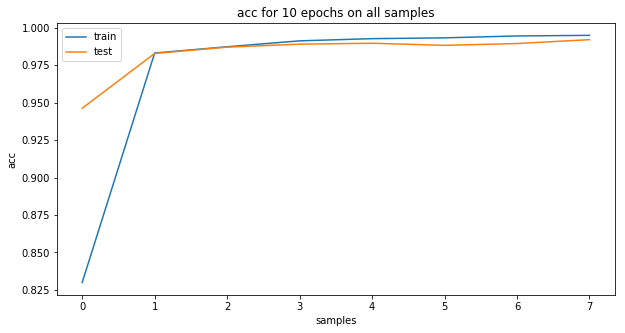

In [41]:
plt.figure(figsize=(10,5))
plt.plot(np.array(mod_data['acc']).flatten()[::10])
plt.plot(np.array(mod_data['val_acc']).flatten()[::10])
plt.title('acc for 10 epochs on all samples')
plt.ylabel('acc')
plt.xlabel('samples')
plt.legend(['train','test'])
plt.show()

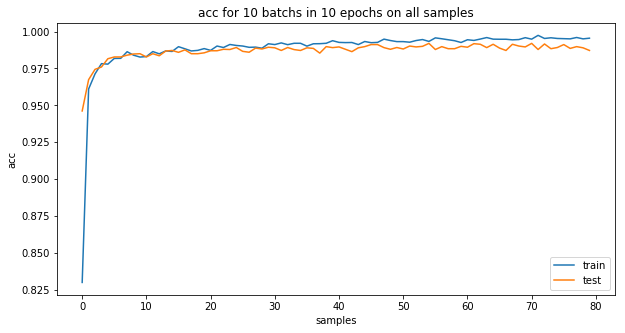

In [44]:
plt.figure(figsize=(10,5))
plt.plot(np.array(mod_data['acc']).flatten())
plt.plot(np.array(mod_data['val_acc']).flatten())
plt.title('acc for 10 batchs in 10 epochs on all samples')
plt.ylabel('acc')
plt.xlabel('samples')
plt.legend(['train','test'])
plt.show()

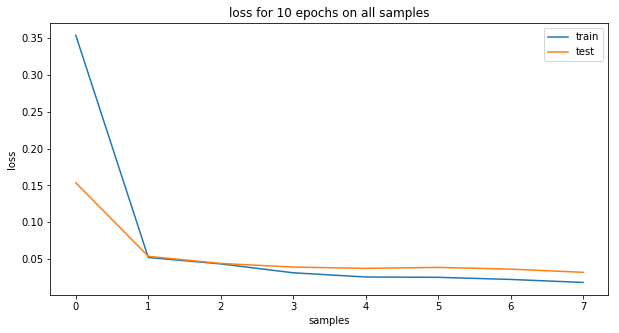

In [42]:
plt.figure(figsize=(10,5))
plt.plot(np.array(mod_data['loss']).flatten()[::10])
plt.plot(np.array(mod_data['val_loss']).flatten()[::10])
plt.title('loss for 10 epochs on all samples')
plt.ylabel('loss')
plt.xlabel('samples')
plt.legend(['train','test'])
plt.show()

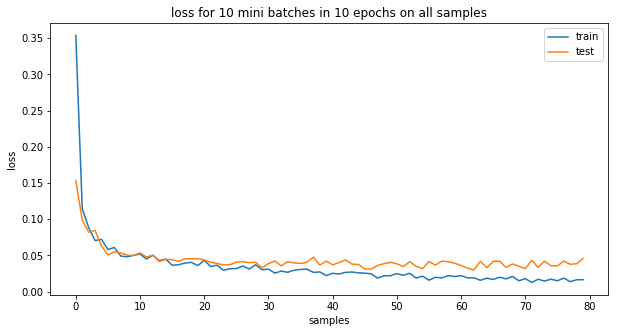

In [45]:
plt.figure(figsize=(10,5))
plt.plot(np.array(mod_data['loss']).flatten())
plt.plot(np.array(mod_data['val_loss']).flatten())
plt.title('loss for 10 mini batches in 10 epochs on all samples')
plt.ylabel('loss')
plt.xlabel('samples')
plt.legend(['train','test'])
plt.show()

In [25]:
def predX(X):
    h=[]
    for e in range(len(X)):
        h.append(np.hstack(X[e]))
    v=np.hstack(h)
    return np.reshape(v,(1,25,300))

In [27]:

d=X_test
d['pred']=0.5

for index, row in d.iterrows():
    #print row["c1"], row["c2"]
    a=row['Sentences']
    Xnew=predX(sent2list(a))
    ynew = mod.predict_classes(Xnew)
    d.at[index,'pred']=ynew

C:\Users\Harsha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Harsha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


In [28]:
%who

Dense	 Embedding	 LSTM	 PorterStemmer	 Sequential	 WordNetLemmatizer	 X_test	 X_train	 Xnew	 
a	 cleantext	 d	 dataset	 fitinmodX	 fitinmodY	 gensim	 history	 i	 
index	 j	 k	 keras	 lemmatizer	 load_model	 mod	 mod_data	 model	 
nltk	 np	 pd	 plt	 pred	 predX	 ps	 re	 row	 
sent2list	 sent_tokenize	 sequence	 shuffle	 train_test_split	 vocab	 word_tokenize	 y_test	 y_train	 
ynew	 


In [29]:
dataset=d

In [33]:
mistakes=dataset[dataset['questions']!=dataset['pred']]
TP=dataset[(dataset['questions']==1) & (dataset['pred']==1)]
TN=dataset[(dataset['questions']==0) & (dataset['pred']==0)]
FP=dataset[(dataset['questions']==0) & (dataset['pred']==1)]
FN=dataset[(dataset['questions']==1) & (dataset['pred']==0)]
total=TP.shape[0]+TN.shape[0]+FP.shape[0]+FN.shape[0]

In [35]:
accuracy=(total-mistakes.shape[0])/total
pres= TP.shape[0]/(TP.shape[0]+FP.shape[0])
recall=TP.shape[0]/(TP.shape[0]+FN.shape[0])
print("acc=%f,press=%f,recall=%f"%(accuracy,pres,recall))

acc=0.987693,press=0.979563,recall=0.995235


In [52]:
print(mistakes.shape[0]," are mistakes out of total test samples ",total)

450  are mistakes out of total test samples  36564


In [54]:
mistakes=mistakes.reset_index(drop=True)

In [57]:
mistakes

,Sentences,length,questions,pred
0,Tin or zinc atoms in place of copper atoms cre...,10,1,0.0
1,Dead animals that died as a result of natural ...,15,1,0.0
2,Predators tend to have larger brains than the...,14,0,1.0
3,Antigen cells in newborns are also struggle to...,10,1,0.0
4,"Mann, R-IL, who had been minority leader for ...",19,0,1.0
5,A Cassock and Surplice typically consisted of?,7,1,0.0
6,Inns are buildings where travellers can seek l...,13,0,1.0
7,A Buddha is no longer bound by Samsara and ha...,20,0,1.0
8,"Then the room was illuminated, thus informing...",14,0,1.0
9,How much of that power has actually been radi...,33,0,1.0


In [59]:
mistakes.to_excel('mistakesintestdata.xlsx')

In [61]:
while True:
    a=input("Enter a sentence: ")
    if a=='bye': break
    Xnew=predX(sent2list(a))
    ynew = mod.predict_classes(Xnew)
    labels=['Prediction : not a question','Prediction :is a question']
    print(labels[ynew[0][0]])

Enter a sentence: do you have any guesses


C:\Users\Harsha\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


Prediction :is a question
Enter a sentence: When to intervene? 
Prediction :is a question
Enter a sentence: Any skin lesions?
Prediction : not a question
Enter a sentence: Any skin lesions ?
Prediction : not a question
Enter a sentence: Did SLET yesterday.
Prediction :is a question
Enter a sentence: i Did SLET yesterday
Prediction : not a question
Enter a sentence: The team looks pretty inflamed
Prediction : not a question
Enter a sentence: does The team looks pretty inflamed
Prediction :is a question
Enter a sentence: this is good
Prediction : not a question
Enter a sentence: is this good
Prediction :is a question
Enter a sentence: bye
